<div dir=rtl><h1>
&emsp;
&emsp;
&emsp;
&emsp;
&emsp;
<b>
פרוייקט חלק 2
</b>
</h1>

<h4>
שמות: אריאל נובומינסקי, אילי ששון
</br>
ת.ז. : 322228974, 322995358
</h4>


</div>

<div dir=rtl>
<h4>
בחלק זה נסתכל על המשתנה הנומרי Rating והמשתנה הקטגורילי Recntly Updated.
<br>
<br>

נטען את סט הנתונים ונבצע את הטרנספורמציות שביצענו בחלק הקודם:
</h4>


</div>

In [112]:
import datetime
import statsmodels.api as sm
import scipy.stats as dist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, scipy.stats as st
import math
import matplotlib.patches as mpatches

In [113]:
df = pd.read_csv("/content/googleplaystore.csv")
df = df.drop(df[(df.Type !='Paid') & (df.Type !='Free')].index)
df = df.dropna()
isFree_Data = df.Type.apply(lambda x: True if x=='Free' else False)
df.insert(7,'IsFree',isFree_Data)
df = df.drop('Type', 1)
df['Last Updated'] = df['Last Updated'].str.replace(',', '')
Last_Updated=pd.to_datetime(df['Last Updated'], format='%B %d %Y')
df = df.drop('Last Updated',axis=1)
df.insert(9,'Last Updated',Last_Updated)
recntly = df['Last Updated'].map(lambda x: True if x > datetime.date(2018,6,1) else False)
df.insert(9,'Recntly Updated',recntly)
df['Installs'] = df['Installs'].map(lambda s: int(s[:-1].replace(',', '')))
df['Reviews'] = df['Reviews'].map(lambda s: int(s))
df.head()

,App,Category,Rating,Reviews,Size,Installs,IsFree,Price,Content Rating,Recntly Updated,Last Updated,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,True,0,Everyone,False,2018-01-07,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,True,0,Everyone,False,2018-01-15,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,True,0,Everyone,True,2018-08-01,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,True,0,Teen,True,2018-06-08,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,True,0,Everyone,True,2018-06-20,Art & Design;Creativity,1.1,4.4 and up


<div dir=rtl>
<h4>
היסטוגרמה של ה - Ratings לפי קטגוריות:
</h4>
</div>

Recntly Updated Histogram: 


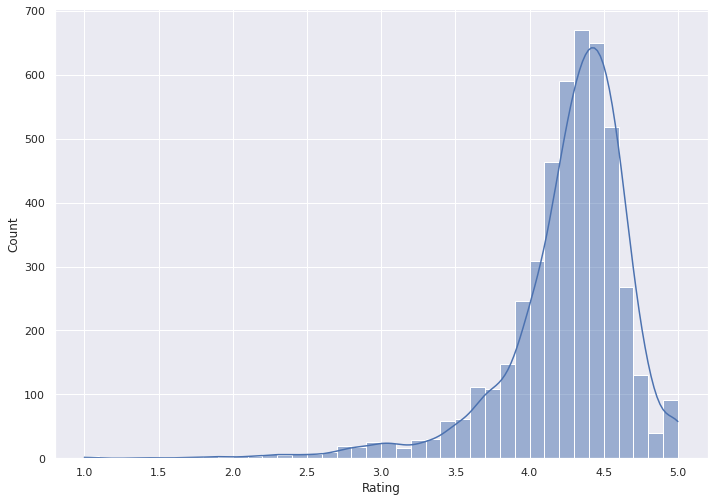

Not Recntly Updated Histogram: 


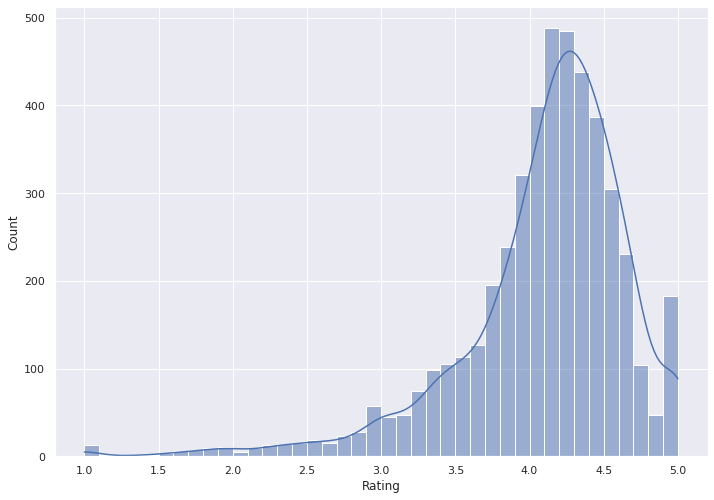

In [114]:
vals_updated = df[df['Recntly Updated'] == True]['Rating']
vals_not_updated = df[df['Recntly Updated'] == False]['Rating']

print('Recntly Updated Histogram: ')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(vals_updated, binwidth=0.1, kde = True)
plt.show()

print('Not Recntly Updated Histogram: ')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(vals_not_updated, binwidth=0.1, kde = True)
plt.show()

<div dir=rtl>
<h4>
נשים לב כי גדלי המדגמים כמעט זהים:
</h4>
</div>

In [115]:
print('First sample size: ', len(vals_updated))
print('Second sample size: ', len(vals_not_updated))

First sample size:  4675
Second sample size:  4685


<div dir=rtl><h1>
<b>אמידה:</b>
</div>

<div dir=rtl>
<h4>
א. חישוב ממוצע בכל קטגוריה:
</h4>
</div>

In [116]:
print('The ratings mean of the applictions who where recntly updated is: ', np.mean(vals_updated))
print('The ratings mean of the applictions who where not recntly updated is: ', np.mean(vals_not_updated))

The ratings mean of the applictions who where recntly updated is:  4.270759358288766
The ratings mean of the applictions who where not recntly updated is:  4.1130843116328775


<div dir=rtl>
<h4>
ב. חישוב רווח סמך מקורב לתוחלת בכל קטגוריה:
</h4>
</div>

In [117]:
print('Confidence interval for the rating of applictions who where recntly updated')
print(st.t.interval(0.95, len(vals_updated) - 1,loc=np.mean(vals_updated), scale=st.sem(vals_updated)))
print('Confidence interval for the rating of applictions who where not recntly updated')
print(st.t.interval(0.95, len(vals_not_updated) - 1,loc=np.mean(vals_not_updated), scale=st.sem(vals_not_updated)))

Confidence interval for the rating of applictions who where recntly updated
(4.258385560611445, 4.283133155966087)
Confidence interval for the rating of applictions who where not recntly updated
(4.096575350816148, 4.129593272449607)


<div dir=rtl>
<h4>
גרף המתאר את רווחי הסמך:
</h4>
</div>



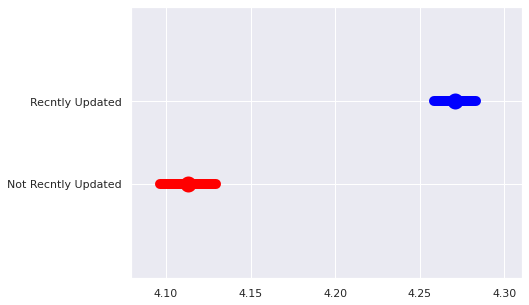

In [118]:
sns.set(rc={'figure.figsize':(7,5)})
plt.yticks(np.arange(2), ['Not Recntly Updated', 'Recntly Updated'])
plt.plot([4.09, 4.09], [-1, -1])
plt.plot([4.3, 4.3], [2, 2])
plt.plot([4.258385560611445, 4.283133155966087], [1, 1], linewidth=10, color='blue')
plt.plot([4.096575350816148, 4.129593272449607], [0, 0], linewidth=10, color='red')
plt.scatter([4.270759358288766], [1], linewidth=10, color='blue')
plt.scatter([4.1130843116328775], [0], linewidth=10, color='red')

<div dir=rtl>
<h4>
ג. ניתן לראות בתרשים למעלה כי רווחי הסמך אינם חופפים כלל.
<br>
משמעות התוצאה היא שאכן יש סיבה להאמין שהתוחלת של דירוג האפליקציות אכן שונה בין אפליקציות שעודכנו לאחרונה לבין אפליקציות שלא עודכנו לאחרונה.
</h4>
</div>

<div dir=rtl><h1>
<b>מבחני השערות:</b>
</h1>
<h4>
א.
נזכר כי הממוצע האמפירי של המדגם הראשון (האפליקציות שעודכנו לאחרונה) הוא 4.27 והממוצע האמפירי של המדגם השני (האפליקציות שלא עודכנו לאחרונה) הוא 4.131. 
<br>
נסמן ב - μᵡ את תוחלת המדגם הראשון וב - μʸ את תוחלת המדגם השני.
<br>
ניסוח ההשערות:
<br>
נרצה לבדוק אם תוחלות המדגמים שונה.
<br>
H0 : μᵡ = μʸ
<br>    
H1 :  μᵡ ǂ μʸ

</h4>


</div>

<div dir=rtl><h4>
ב. עבור שני המדגמים הנחות מבחן t אינן מתקיימות וזאת מכיוון שלפי ההיסטוגרמות נראה כי הנתונים אינם מתפלגים נורמלית, אלא נורמלית עם זנב ימני צר וזנב שמאלי כבד (כפי שהראנו בחלק 1 של הפרוייקט).

</h4>
</h1>

</div>

<div dir=rtl>
<h4>
ג. 
נבצע מבחן t:
<br>
נחשב אומדן לשונות:
</h4>
</div>

In [119]:
m1 = np.mean(vals_updated)
m2 = np.mean(vals_not_updated)
n1 = len(vals_updated)
n2 = len(vals_not_updated)
s1_sq = (np.var(vals_updated)*n1)/(n1 - 1)
s2_sq = (np.var(vals_not_updated)*n2)/(n2 - 1)
se = np.sqrt((((n1 - 1)*s1_sq + (n2 - 1)*s2_sq)/(n1 + n2 - 2))*((n1 + n2)/(n1*n2)))
print('The empirical variance of the first sample is: ', s1_sq)
print('The empirical variance of the second sample is: ', s2_sq)
print('The se of the differnce is: ', se)

The empirical variance of the first sample is:  0.18623722812967308
The empirical variance of the second sample is:  0.33222201786868266
The se of the differnce is:  0.010526887003728056


<div dir=rtl>
<h4>
נחשב את ערך סטטיסטי המבחן:
<br>
t = (m1 - m2)/se
</h4>
</div>

In [120]:
t_val = (m1 - m2)/se
print('t = ', t_val)

t =  14.978316628652731


<div dir=rtl>
<h4>
רמת הביטחון הרצויה היא α = 0.05 והמבחן הוא דו צדדי.
נחשב את אזור הדחייה:
</h4>
</div>

In [121]:
dist.t.ppf(0.975, len(df) - 1)
print('R.R = ', dist.t.ppf(0.975, len(df) - 1), '~ 2')

R.R =  1.9602174916284925 ~ 2


<div dir=rtl>
<h4>
נחשב את ה - Pvalue:
</h4>
</div>

In [122]:
pval = dist.t.sf(t_val, len(df) - 1)*2
print('Pvalue = ', pval)

Pvalue =  3.8677889480909926e-50


<div dir=rtl>
<h4>
קיבלנו כי סטטסטי המבחן שווה ל - 14.98.
<br>
|14.98| > 2 ולכן ניתן לדחות את H0, כלומר קיבלנו כי תוחלות המדגמים אכן שונות.
<br>
קיבלנו כי ה - Pvalue שווה ל - (50)-^10*3 (קרוב מאוד  ל - 0) אך מכיוון שלא קיבלנו את השערת האפס עובדה זאת לא נותנת לנו מידע.
</h4>
</div>

<div dir=rtl>
<h4>
ד. נבצע מבחן וולד:
<br>
נחשב אומדן לשונות:
</h4>
</div>

In [123]:
se = np.sqrt(np.var(vals_not_updated)/n1 + np.var(vals_updated)/n2)
print('The se of the differnce is: ', se)

The se of the differnce is:  0.010525762276228322


<div dir=rtl>
<h4>
נחשב את סטטסטי המבחן:
</h4>
</div>

In [124]:
w_val = (abs(m1 - m2) - 0)/se
print('w = ', w_val)

w =  14.979917132651384


<div dir=rtl>
<h4>
נחשב את ה - Pvalue:
</h4>
</div>

In [125]:
pval = 2 * dist.norm.pdf(-abs(w_val))
print('Pvalue = ', pval)

Pvalue =  1.4946910851913512e-49



<div dir=rtl>
<h4>
קיבלנו כי סטטסטי המבחן שווה ל - 14.98.
<br>
|14.98| > 2 (הערך המקורב של השברון ה - 0.975 בהתפלגות נורמלית) ולכן ניתן לדחות את H0, כלומר קיבלנו כי תוחלות המדגמים אכן שונות.
<br>
קיבלנו כי ה - Pvalue שווה ל - (49)-^10*1 (קרוב מאוד  ל - 0) אך מכיוון שלא קיבלנו את השערת האפס עובדה זאת לא נותנת לנו מידע.
</h4>

<div dir=rtl>
<h4>
ה. בשתי המבחנים שבצענו קיבלנו תוצאות כמעט זהות. סטטסטי המבחן בשני המקרים היה 14.98 (בקירוב) וכן אזור הדחייה היה זהה (התפלגות t אם דרגת חופש מאוד גדולה, כמו במקרה שלנו, מתפלגת כמו התפלגות נורמלית). בנוסף בשני המבחנים ה - Pvalue היה מאוד קרוב לאפס.
<br>
המסקנות מהמבחנים היו זהות (דחיית H0).
</h4>
</div>

<div dir=rtl>
<h4>
ו. נניח כי הנתונים מגיעים מהתפלגות גמא.
<br>
הפיתוח המתמטי:
</h4>
</div>

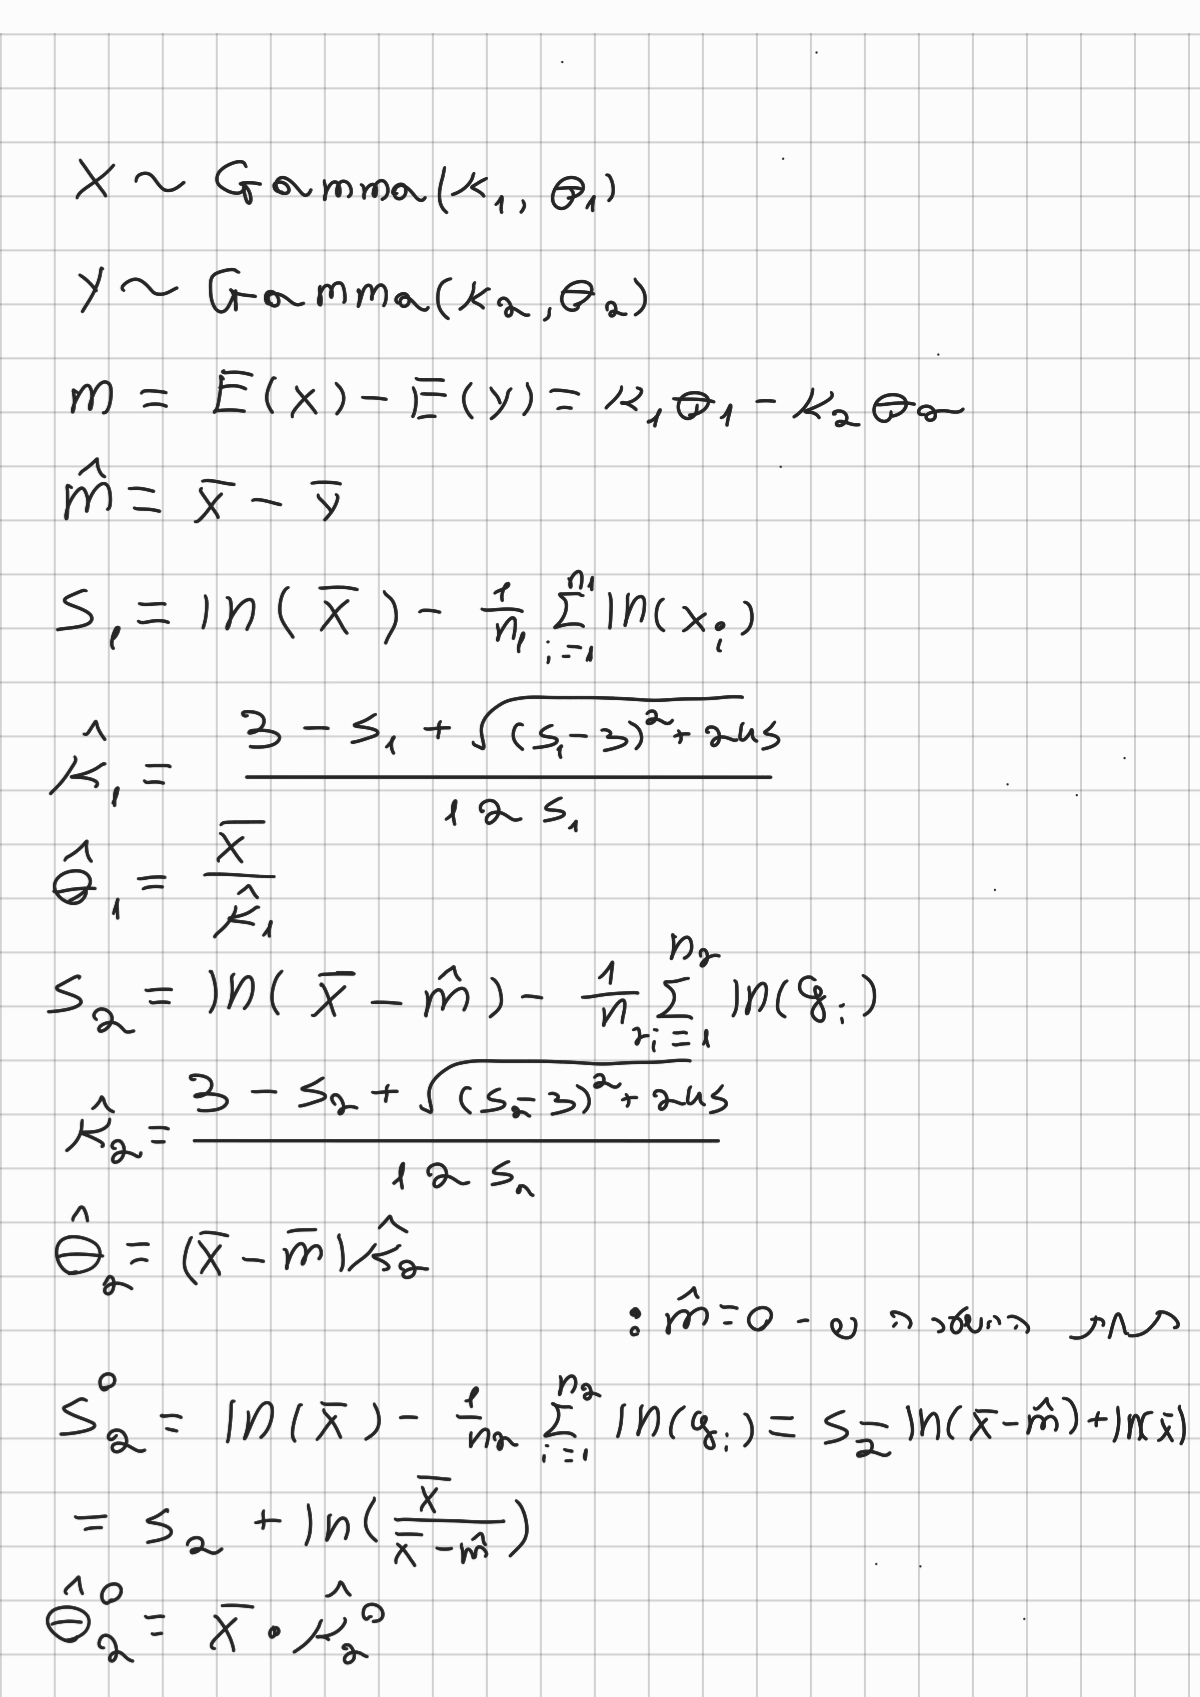

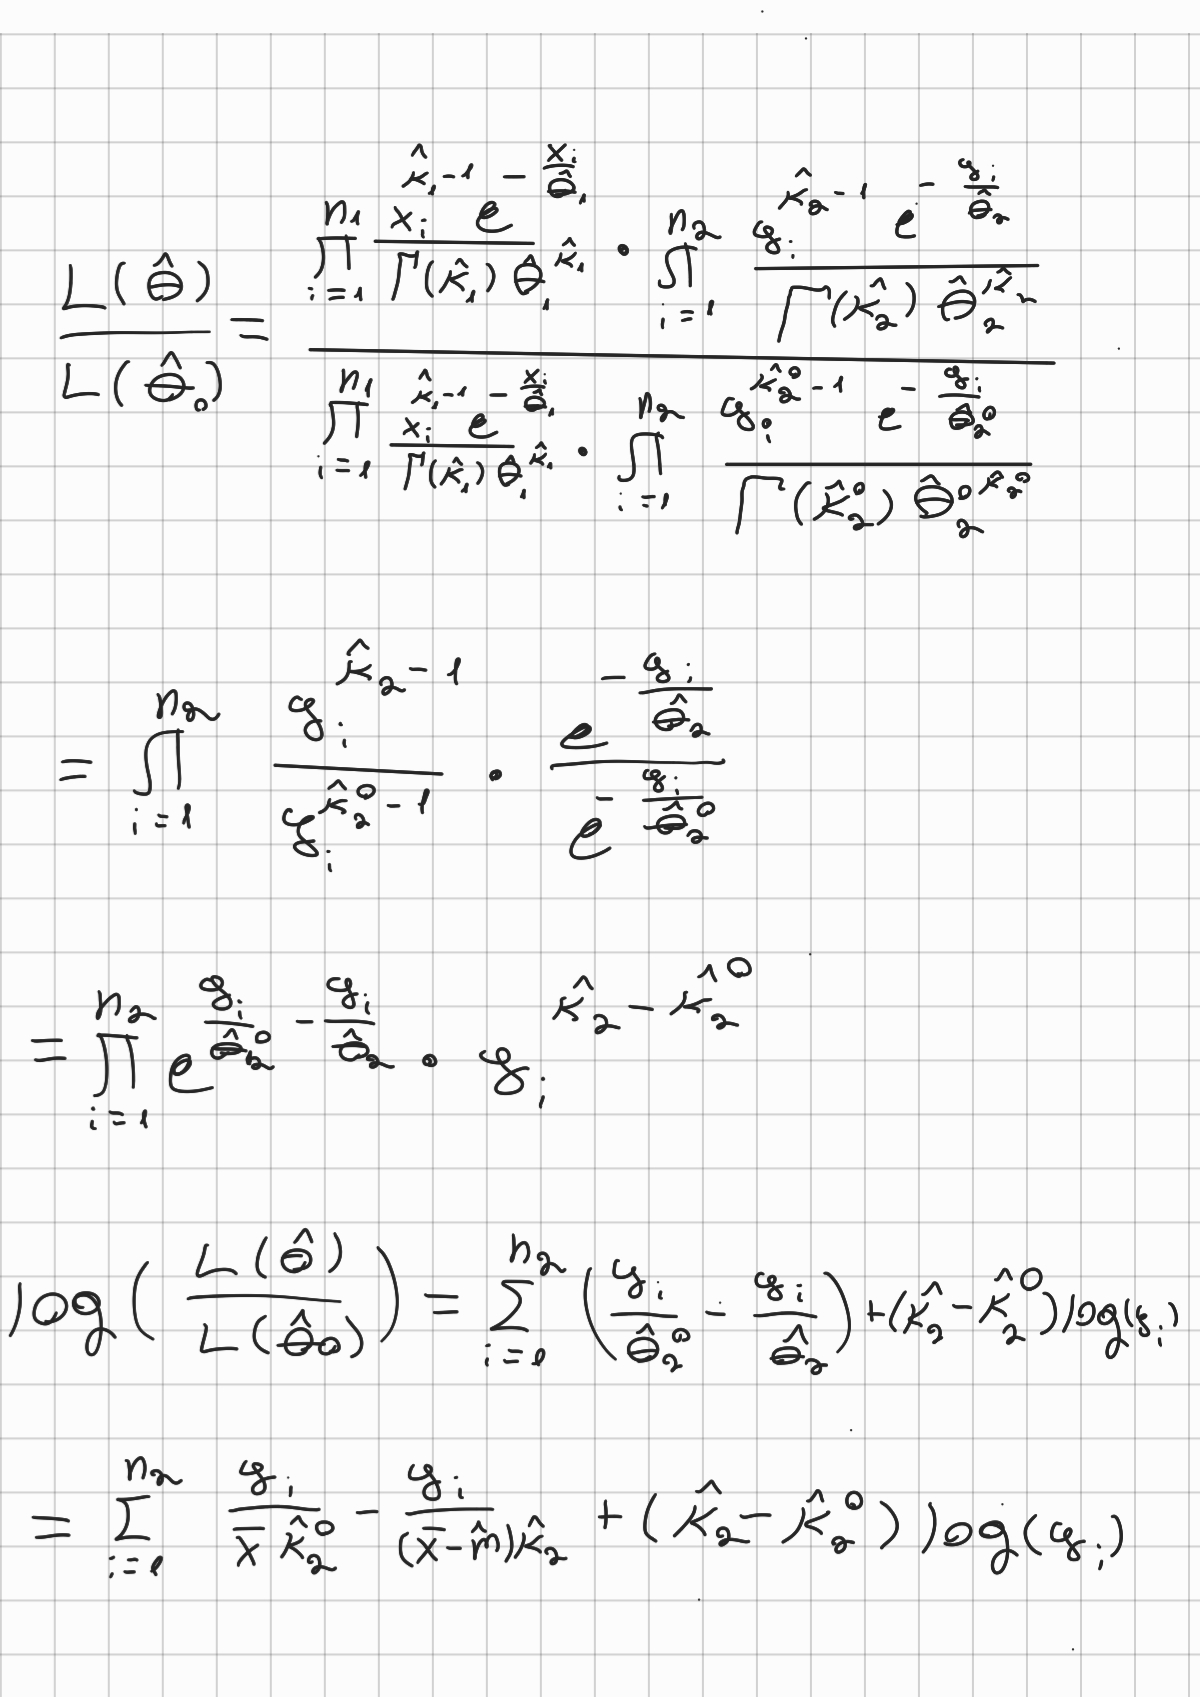

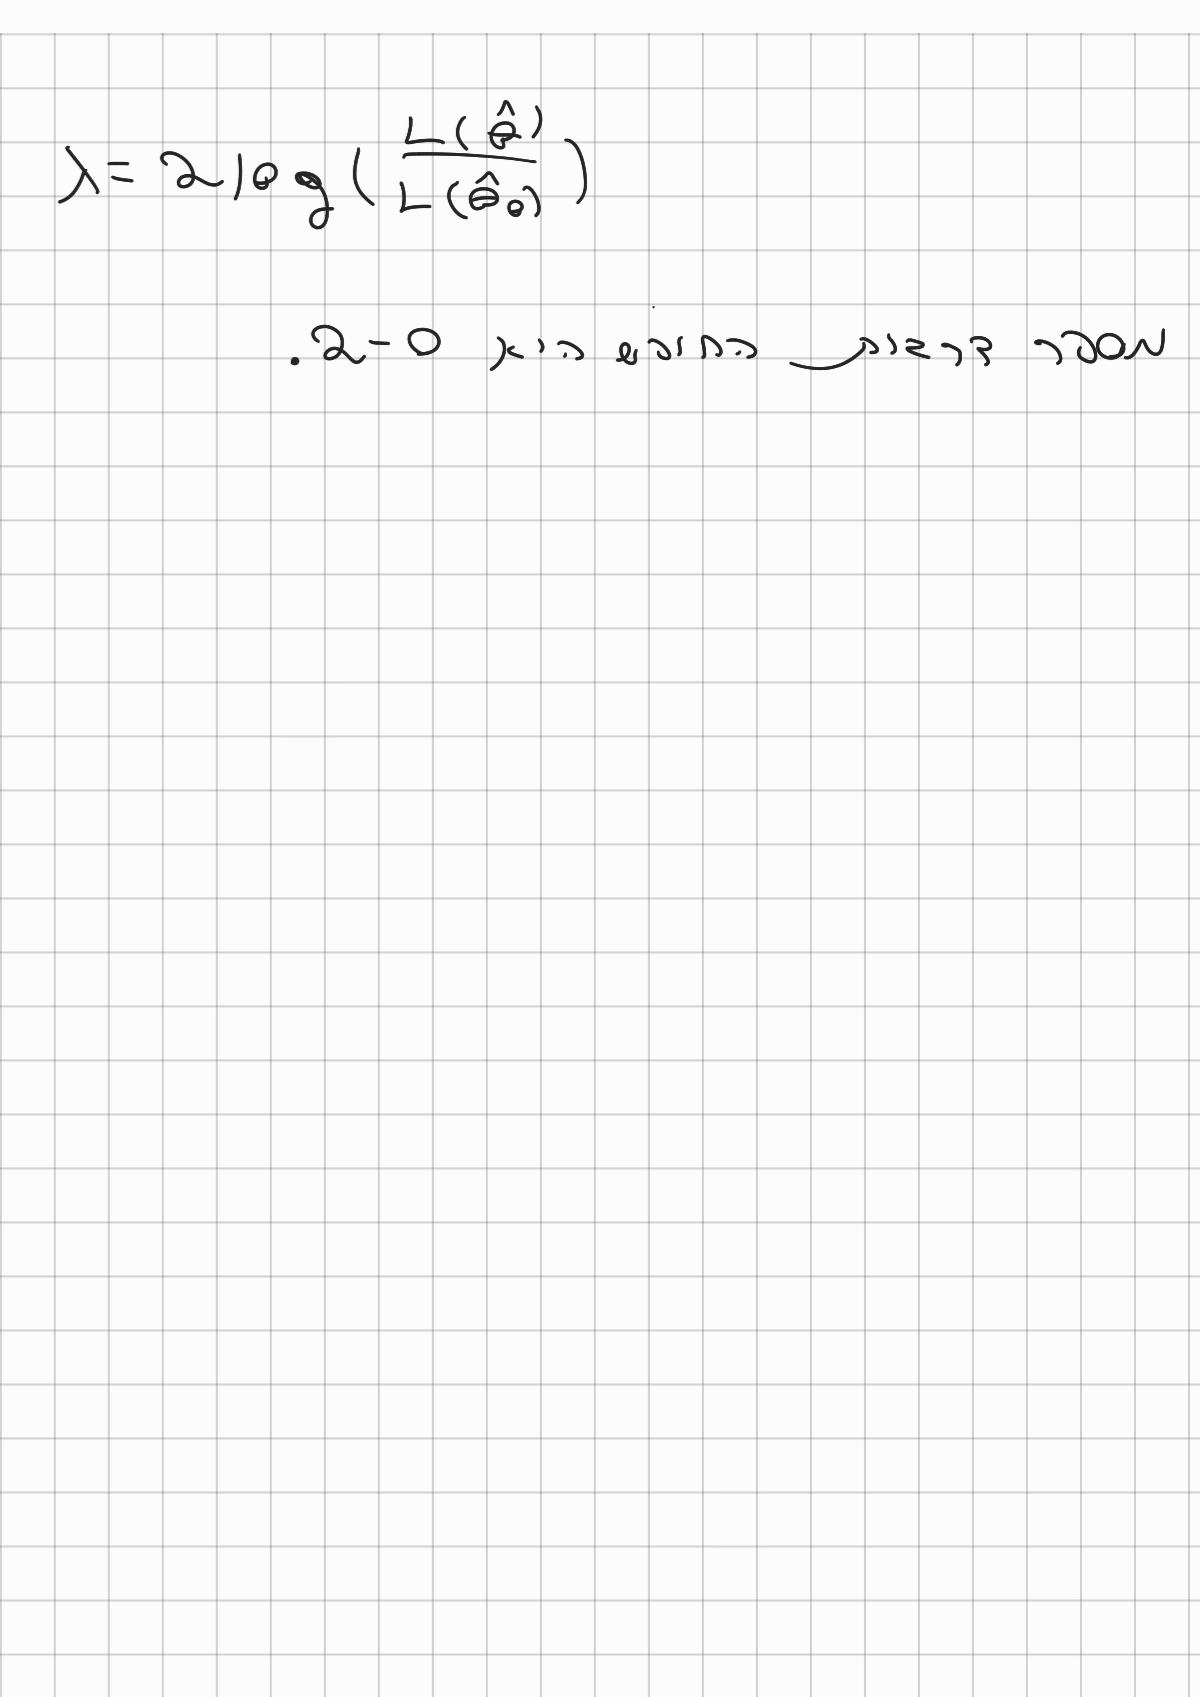

<div dir=rtl>
<h4>
נבצע מבחן יחס נראות:
</h4>
</div>

In [126]:
gama = 0
m_cova = m1 - m2
s2 = np.log(m1 - m_cova) - (1/n1)*sum([np.log(y) for y in vals_not_updated])
s2_0 = s2 + np.log(m1/(m1 - m_cova))
k2_cova = (3 - s2 + np.sqrt((s2 - 3)**2 + 24*s2))/(12*s2)
k2_cova_0 = (3 - s2_0 + np.sqrt((s2_0 - 3)**2 + 24*s2_0))/(12*s2_0)
for yi in vals_not_updated:
  gama += yi/(m1*k2_cova_0) - yi/(m1*k2_cova) + (k2_cova - k2_cova_0)*np.log(yi)
gama *= 2

print('gama = ', gama)
print('Pvalue = ', dist.chi2.cdf(gama, 2))


gama =  537050.5863608742
Pvalue =  1.0


<div dir=rtl>
<h4>
קיבלנו כי ה - Pvalue שווה ל - 1 (או ממש קרוב ל - 1) ולכן אין עדות לדחייה של השערת האפס או שהעוצמה של המבחן לא מספיק גדולה וצריך
לבדוק מבחן אחר. 
</h4>
</div>

<div dir=rtl><h1>
<b>גדלי מדגם שונים:</b>
</h1>
<h4>
א. נבחר מדגמים באופן אקראי:
</h4>


</div>


In [127]:
def choose_samples():
  sample_list_up = []
  sample_list_not_up = []
  sample_sizes = [30, 50, 100, 500]
  for s in sample_sizes:
    sample_list_up.append(np.random.choice(vals_updated, s))
    sample_list_not_up.append(np.random.choice(vals_not_updated, s))
  return (sample_list_up,sample_list_not_up)

<div dir=rtl>
<h4>
ב. חישוב רווח סמך עבול כל אחד מהמדגמים:
</h4>


</div>

[(3.8154326349873524, 4.337900698345981), (3.9624652004655365, 4.373534799534464), (4.023421602126203, 4.2305783978737965), (4.053688080458519, 4.156711919541481)]


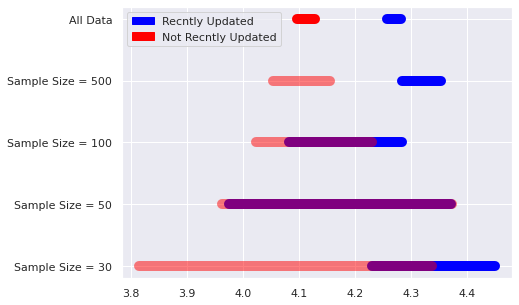

In [160]:
conf_up = []
conf_not_up = []
samples_updated,samples_not_updated = choose_samples()
for s in samples_updated:
  conf_up.append(st.t.interval(0.95, len(s) - 1,loc=np.mean(s), scale=st.sem(s)))

for s in samples_not_updated:
  conf_not_up.append(st.t.interval(0.95, len(s) - 1,loc=np.mean(s), scale=st.sem(s)))


print(conf_not_up)

sns.set(rc={'figure.figsize':(7,5)})
plt.yticks(np.arange(5), ['Sample Size = 30', 'Sample Size = 50', 'Sample Size = 100', 'Sample Size = 500', 'All Data'])
i = 0
for c in conf_up:
  plt.plot(c, [i, i], linewidth=10, color='blue')
  i += 1

plt.plot([4.258385560611445, 4.283133155966087], [i, i], linewidth=10, color='blue')


i = 0
for c in conf_not_up:
  plt.plot(c, [i, i], linewidth=10, color='red',alpha = 0.5)  
  i += 1

plt.plot([4.096575350816148, 4.129593272449607], [i, i], linewidth=10, color='red',label = 'Not Recntly Updated')  
red_patch = mpatches.Patch(color='red', label='Not Recntly Updated')
blue_patch = mpatches.Patch(color='blue', label='Recntly Updated')
plt.legend(handles = [blue_patch,red_patch])

plt.show()  


<div dir=rtl>
<h4>
ניתן לראות כי ככל שגדול הדגימה גדל קורות שתי תופעות במקביל:
<br/>
1. אורכי רווחי הסמך קטנים- האורך של רווחי הסמך עבור שתי הקבוצות קטנים ככל שגודל הדגימה גדל, ועבור כל הדטא אפשר לראות כי אורכי הסמך קטנים וככל שגודל המדגם גדל המגמה היא התקרבות לאורך הקטן הנל.
<br>
2. החפיפה בין רווחי הסמך של הקבוצות קטנה והמרחק בניהם גדל - ככל שגודל הדגימה גדל ניתו לראות כי בהתחלה שטח החפיפה קטן, ולאחר מכן כבר אין חפיפה. לאחר שאין חפיפה, הגדלה של גודל המדגם גוררת מרחק גדול בין רווחי הסמך.
</h4>
</div>

<div dir=rtl>
<h4>
ג. נבצע מבחן וולד עבור כל אחד מהגדלים ואת התוצאה נשים נשים בתוך מערך מתאים:
<br>
</h4>
</div>

In [174]:
se_samples = []
w_samples = []
pval_samles = []
test_result = [] # 1 if we decline H0,0 otherwise. result per sample size of : 30,50,100,500

In [175]:
for i in range(4):
  cur_updated = samples_updated[i]
  cur_not_updated = samples_not_updated[i]
  m_updated = cur_updated.mean()
  m_not_updated = cur_not_updated.mean()
  se = np.sqrt(np.var(cur_not_updated)/len(cur_updated) + np.var(cur_updated)/len(cur_not_updated))
  se_samples.append(se)
  w_val = (abs(m_updated - m_not_updated) - 0)/se
  w_samples.append(w_val)
  test_result.append(1 if np.abs(w_val) > 2 else 0)
  pval_samles.append(2 * dist.norm.pdf(-abs(w_val)))


In [176]:
test_result

[0, 0, 0, 1]

<div dir=rtl>
<h4>
לכן נקבל כי עבור גדול מדגם 30 לא ניתן לדחות ועבור גודל מדגם של  50, 100 ו500 נדחה את H0. בשאלה 2 עבור גודל מדגם ששווה לכל הדטא דחינו והתוצאה סבירה מפני שהגדלנו את גודל המדגם והתקרבנו למצב עליו עבדנו ב2 ולכן סביר לחשוב כי עבור קלטים קטנים לא יהיה לנו מספיק מידע לדחות את H0.
</h4>
</div>

In [177]:
pval_samles

[0.1232278252999069,
 0.7971599066272369,
 0.5859933628710309,
 9.863062732223819e-11]

<div dir=rtl>
<h4>
ניתן לראות כי ככל שגודל המדגם גדל ה - Pvalue קטן, ואף עבור גודל מדגם 100 מאוד קרוב ל - 0.
בשאלה 2 עבור גודל מדגם ששווה לכל הדטא קיבלנו Pvalue קרוב מאוד ל - 0 והתוצאה סבירה מפני שהגדלנו את גודל המדגם והתקרבנו למצב עליו עבדנו ב2 ולכן סביר לחשוב כי עבור קלטים קטנים לא יהיה לנו מספיק מידע לדחות את H0.
</h4>
</div>

<div dir=rtl>
<h4>
ד.
</h4>
</div>

In [132]:
confidence_interval_updated = []
confidence_interval_not_updated = []
p_values = []
counts_updated = [0]*4
counts_not_updated =[0]*4
sizes =  [30, 50, 100, 500]
for i in range(100):
  samples_updated,samples_not_updated  = choose_samples()
  cur_conf_up = []
  cur_conf_not_up = []
  for j,s in enumerate(samples_updated):
    conf_interval = st.t.interval(0.95, len(s) - 1,loc=np.mean(s), scale=st.sem(s))
    cur_conf_up.append(conf_interval)
    if np.mean(vals_updated) >= conf_interval[0] and np.mean(vals_updated) <= conf_interval[1]:
      counts_updated[j] +=1
  for j,s in enumerate(samples_not_updated):
    conf_interval = st.t.interval(0.95, len(s) - 1,loc=np.mean(s), scale=st.sem(s))
    cur_conf_not_up.append(list(conf_interval))
    if np.mean(vals_not_updated) >= conf_interval[0] and np.mean(vals_not_updated) <= conf_interval[1]:
      counts_not_updated[j] +=1
  confidence_interval_updated.append(cur_conf_up)
  confidence_interval_not_updated.append(cur_conf_not_up)
for i in range(4):
  counts_updated[i] /= 100
  counts_not_updated[i] /= 100

<div dir=rtl>
<h4>
כעת נייצר טבלה המייצגת את אחוז הפעמים שהממוצעים נמצאים ברווח הסמך:</h4>
</div>

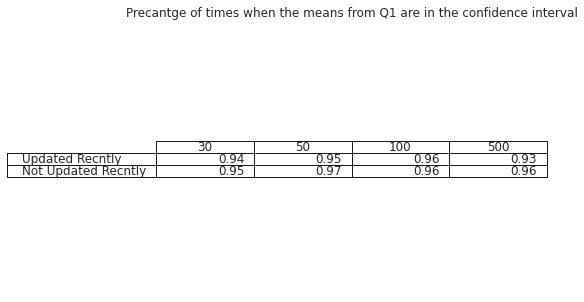

In [133]:
data = [counts_updated,counts_not_updated]
column_labels = sizes
row_labels = ['Updated Recntly','Not Updated Recntly']
df=pd.DataFrame(data,columns=column_labels)
plt.axis('tight')
plt.axis('off')
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.title('Precantge of times when the means from Q1 are in the confidence interval')

plt.table(cellText=df.values,colLabels=df.columns,rowLabels=row_labels,loc="center")
plt.show()

<div dir=rtl>
<h4>
היסטוגרמות המתארות לכל גודל מדגם את מופעי אורכי רווחי הסמך:
</h4>
</div>

In [155]:
def plot_samples(is_recntly,data):
  sns.set(rc={'figure.figsize':(13,8)})
  colors = ['blue','black','orange','green']
  for i in range(4):
    to_plot = [conf_list[i][1]-conf_list[i][0] for conf_list in data]
    plt.hist(to_plot,color = colors[i],alpha =0.5,label = sizes[i])
    plt.rcParams["figure.figsize"] = [14,9]
  plt.legend([sizes[0],sizes[1],sizes[2],sizes[3]],title='sample size of:')
  plt.title('Confidence interval length of apps which'+ is_recntly+' got an update recntly')
plt.show()

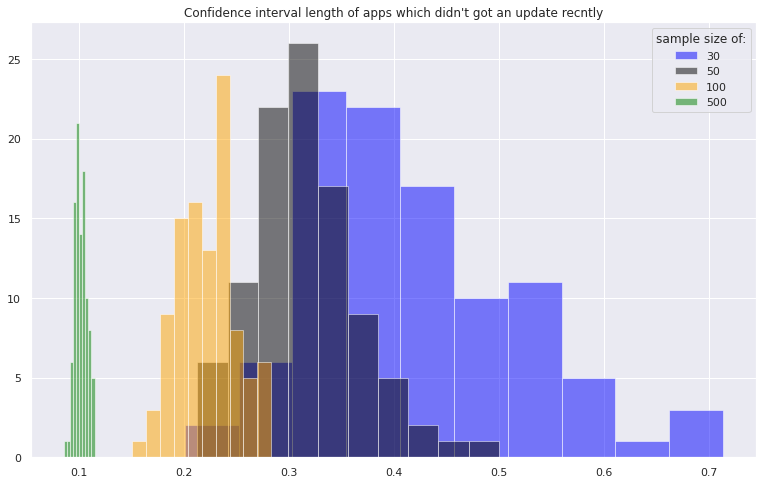

In [156]:
plot_samples(" didn't",confidence_interval_not_updated)

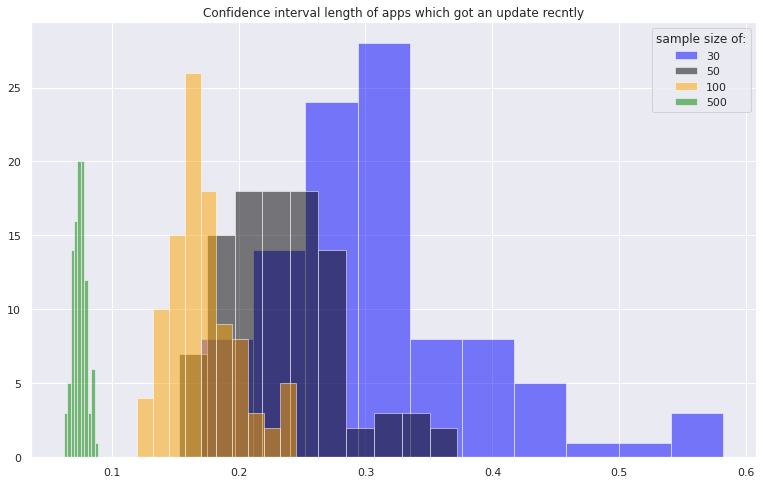

In [157]:
plot_samples("",confidence_interval_updated)

<div dir=rtl>
<h4>
בתרשימים ניתן ליראות כי ככל שגודל המדגם גדל מתקיים:
<br>
1. ממוצע התפלגות גדלי רווחי הסמך הולכת וקטנה.
<br>
2. שונות גדלי רווחי הסמך הולכת וקטנה
<br>
תופעה זאת תומך במסקנותינו מסעיף ב'.
</h4>
</div>

<div dir=rtl>
<h4>
באופן דומה, ניצור היסטגרמות המתארות לכל גודל מדגם את התפלגות ה - Pvalue.
</h4>
</div>

In [184]:
pval = [[], [], [], []]
for i in range(100):
  samples_updated, samples_not_updated  = choose_samples()
  for j in range(4):
    sample_up = samples_updated[j]
    sample_not_up = samples_not_updated[j]
    m_updated = sample_up.mean()
    m_not_updated = sample_not_up.mean()
    se = np.sqrt(np.var(sample_not_up)/len(sample_up) + np.var(sample_up)/len(sample_not_up))
    w_val = (abs(m_updated - m_not_updated) - 0)/se
    pval[j].append(2 * dist.norm.pdf(-abs(w_val)))

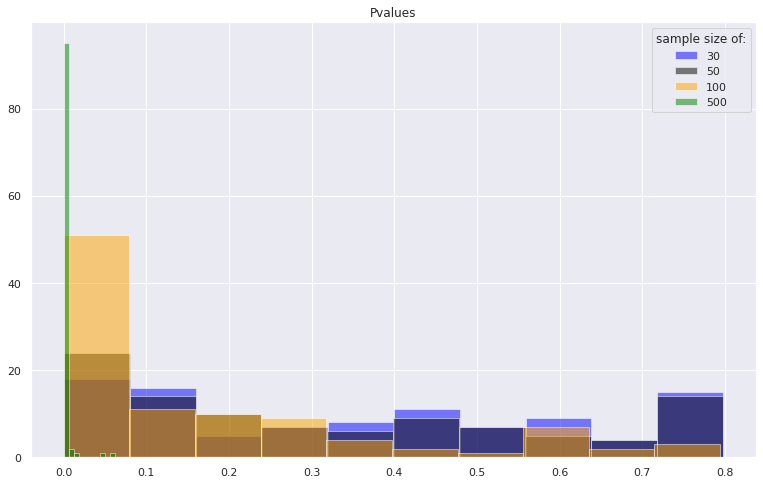

In [188]:
sns.set(rc={'figure.figsize':(13,8)})
colors = ['blue','black','orange','green']
for i in range(4):
  plt.hist(pval[i],color = colors[i],alpha =0.5,label = sizes[i])
  plt.rcParams["figure.figsize"] = [14,9]
plt.legend([sizes[0],sizes[1],sizes[2],sizes[3]],title='sample size of:')
plt.title('Pvalues')
plt.show()

<div dir=rtl>
<h4>
קיבלנו כי עבור גדלי מדגם נמוכים ההתפלגות יוניפורמית בין 1 ל - 0 , כלומר ערך ה - Pvlaue הוא רנדומי לגמרי ולמבחן אין משמעות אמיתית, אך עבור גדלי מדגם גדולים מתקבלת התפלגות המזכירה התפלגות אקספונניאלית ואף התפלגויות בהם ההסתברות לקבל ערך שאינו 0 שואפת ל - 0.
תוצאה זאת מראה כי עבור גדלי מדגם גדולים (ואף גודל מדגם של 100 כנראה מספיק) הסיכוי לקבל את השערת האפס למרות שהיא לא נכונה מאוד קטנה.
</h4>
</div>